# 릿지(Ridge) 회귀
- 규제 선형 모델: MSE를 최소화하고 회귀계수의 크기를 제어함으로써, 다항 회귀에서의 과적합(overfitting)을 방지
- 릿지 회귀는 L2 규제를 적용
    - L2 규제: 가중치의 값을 이용하여 이상치(outlier)나 노이즈가 있는 데이터 학습에 적합 => 가중치 절댓값의 크기 감소시킴

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1, inplace=False)

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.518166280868971


### 일반 선형 회귀를 했을 때보다 RMSE 값이 줄어든 것을 확인할 수 있다

### L2 Regularization은 alpha 값에 패널티를 부여하여 가중치 절댓값의 크기를 감소시키고 overfitting을 방지

In [7]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {} : {}'.format(alpha, avg_rmse))

alpha 0 : 5.828658946215808
alpha 0.1 : 5.78848662703241
alpha 1 : 5.6525709656135446
alpha 10 : 5.518166280868971
alpha 100 : 5.329589628472144


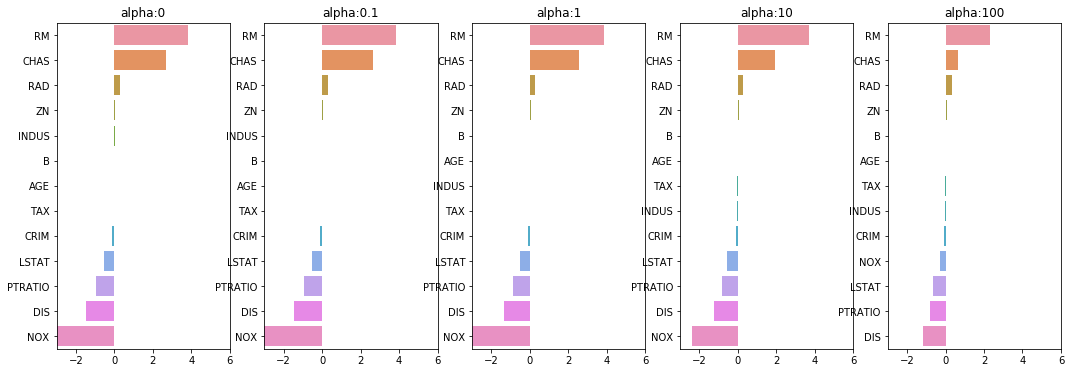

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [11]:
sort_column = 'alpha:' + str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 이로써 alpha의 값이 커질수록 상대적으로 값이 큰 가중치의 값들이 작아지는 것을 확인할 수 있다